# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

![title](equatorsign.png)

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
import citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#save lats & lngs
lats_Saved_list= []
long_Saved_list = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lats_Saved_list.append(lat_lng[0])
        long_Saved_list.append(lat_lng[1])
        

#create df
list_df = pd.DataFrame({"City":cities, "Lat":lats_Saved_list,"Long":long_Saved_list})
list_df.to_csv("ListofCities,csv")
list_df.head()

,City,Lat,Long
0,akdepe,41.949541,59.576897
1,pisco,-26.928094,-100.010592
2,edd,13.978867,41.824420
3,sabang,6.738577,90.018013
4,horsham,-36.571896,141.174563


In [5]:
# Print the city count to confirm sufficient count
len(list_df)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#define URL
url_base = "http://api.openweathermap.org/data/2.5/weather?"
units =  "standard"
api_key = weather_api_key

#query URL
query_url = f"{url_base}appid={api_key}&units{units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=


In [7]:
#make list to store parameters to request/store
L_city = []
L_lat = []
L_lng = []
L_cloudiness = []
L_country = []
L_date = []
L_humidity = []
L_tempMaX = []
wind_speed_list = []
index_counter = 0
set_counter = 1

#loop throgh "cities"
for index, city in enumerate(cities, start = 1):
    try:
        print(query_url+city)
        response = requests.get(query_url + city).json()
        L_city.append(response["name"])
        L_cloudiness.append(response["clouds"]["all"])
        L_country.append(response["sys"]["country"])
        L_date.append(response["dt"])
        L_humidity.append(response["main"]["humidity"])
        L_lat.append(response["coord"]["lat"])
        L_lng.append(response["coord"]["lon"])
        L_tempMaX.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
         # limit query time
        time.sleep(0.01)
            
        
    except(KeyError, IndexError):
        print("#####City not found#####")

print("Done!!")


http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=akdepe
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pisco
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=edd
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=sabang
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=horsham
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=busselton
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=kununurra
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=madanapalle
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=mombetsu
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=zeya
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=seydi
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=marawi
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pandan
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=constitucion
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=nara
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=vaini
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=taltal
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=faya
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ust-maya
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=skalistyy
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ahipara
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=waiuku
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=yulara
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pauini
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=katsuura
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=abnub
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=anadyr
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=saint-philippe
ht

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=nanchong
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=yongan
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=hami
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=aitape
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=susangerd
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=flinders
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=maumere
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=kuche
#####Ci

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=caravelas
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=champerico
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=hamilton
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=te anau
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=jutai
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ferry pass
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=mahibad

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=ahar
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=seye
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=port hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=erenhot
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=yeletskiy
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=salta
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=zhanaozen
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&u

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=gazojak
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=pasni
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=tawang
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=xicotencatl
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=durant
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandar

http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=valcanesti
#####City not found#####
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=suoyarvi
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=yola
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=piacabucu
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=storsteinnes
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=viedma
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=clarksdale
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&unitsstandard&q=miri
http://api.openweathermap.org/data/2.5/weather?appid=04fd34c2ec5995cfb3c966c74378af1a&un

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [8]:
# Create a panda data frame using data retrieved
weather_byCity = pd.DataFrame({ 
                "City" : L_city,
                "Country" : L_country,
                "Lat" : L_lat,
                "Lng" : L_lng,    
                "Cloudiness" : L_cloudiness,                
                "Date" : L_date,
                "Humidity" : L_humidity,                
                "Max Temp" : L_tempMaX,
                "Wind Speed" : wind_speed_list
})
#export to csv
weather_byCity .to_csv('WeaterBycity.csv')

print(weather_byCity)

              City Country      Lat       Lng  Cloudiness        Date  \
0           Akdepe      TM  42.0551   59.3788           0  1619752218   
1            Pisco      PE -13.7000  -76.2167           0  1619752219   
2              Edd      ER  13.9297   41.6925          90  1619752219   
3           Sabang      ID   5.8933   95.3214         100  1619752220   
4          Horsham      GB  51.0640   -0.3272           0  1619752220   
..             ...     ...      ...       ...         ...         ...   
548        Balabac      PH   7.9868  117.0645           8  1619752462   
549  Srednekolymsk      RU  67.4500  153.6833         100  1619752463   
550       Karasjok      NO  69.4719   25.5112          75  1619752463   
551         Bonthe      SL   7.5264  -12.5050          53  1619752464   
552           Ipil      PH   7.7500  122.5167          27  1619752464   

     Humidity  Max Temp  Wind Speed  
0          82    287.15        5.14  
1          88    292.04        2.06  
2        

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
checkAbove100= weather_byCity['Humidity'].describe(include='all')
checkAbove100

count    553.000000
mean      70.629295
std       21.342913
min        1.000000
25%       61.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

No cities above 100%

In [10]:
#make df with <=100% humidity
Lessthan100 = weather_byCity.loc[weather_byCity['Humidity']<=100]
len(Lessthan100)

553

In [11]:
#  Get the indices of cities that have humidity over 100%.
index100 = weather_byCity
bool_arr = index
output =np.where



In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Lessthan100

In [13]:
clean_city_data


,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Akdepe,TM,42.0551,59.3788,0,1619752218,82,287.15,5.14
1,Pisco,PE,-13.7000,-76.2167,0,1619752219,88,292.04,2.06
2,Edd,ER,13.9297,41.6925,90,1619752219,71,302.46,4.96
3,Sabang,ID,5.8933,95.3214,100,1619752220,69,301.36,0.58
4,Horsham,GB,51.0640,-0.3272,0,1619752220,100,278.15,2.72
...,...,...,...,...,...,...,...,...,...
548,Balabac,PH,7.9868,117.0645,8,1619752462,66,303.12,4.80
549,Srednekolymsk,RU,67.4500,153.6833,100,1619752463,93,272.41,3.23
550,Karasjok,NO,69.4719,25.5112,75,1619752463,80,270.15,4.12
551,Bonthe,SL,7.5264,-12.5050,53,1619752464,80,299.68,1.75


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

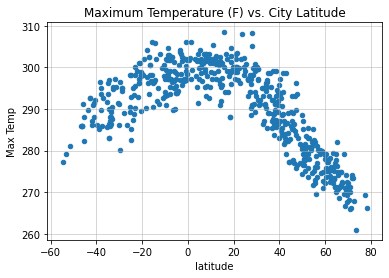

In [14]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp",  
                                      title="Maximum Temperature (F) vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("TempmaxVlatitude_All_Cities.png")

## Latitude vs. Humidity Plot

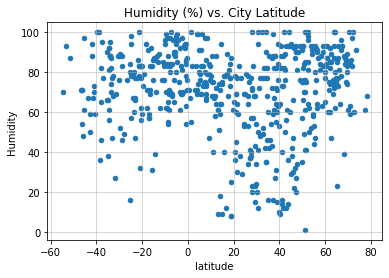

In [15]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Humidity",  
                                      title="Humidity (%) vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("HumidityVSLatitude_All_Cities.png")

## Latitude vs. Cloudiness Plot

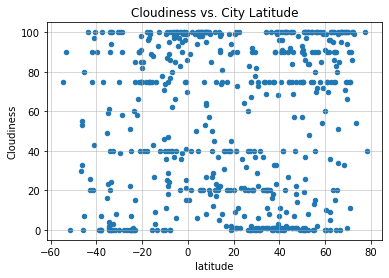

In [16]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness",  
                                      title="Cloudiness vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("CloudinessVSLatitude_All_Cities.png")

## Latitude vs. Wind Speed Plot

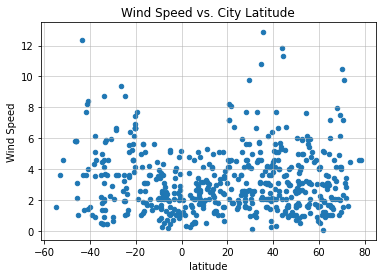

In [17]:
#Make Plot lat vs max temp
lat_vs_T_axes = clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",  
                                      title="Wind Speed vs. City Latitude")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("latitude")

lat_vs_T_axes.get_figure().savefig("windspeedVSLatitude_All_Cities.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
#northem hemisphere is define by lat >=0
#create df for northemhemisfere
North_df = clean_city_data.loc[(clean_city_data['Lat']>=0)]
North_df

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,Akdepe,TM,42.0551,59.3788,0,1619752218,82,287.15,5.14
2,Edd,ER,13.9297,41.6925,90,1619752219,71,302.46,4.96
3,Sabang,ID,5.8933,95.3214,100,1619752220,69,301.36,0.58
4,Horsham,GB,51.0640,-0.3272,0,1619752220,100,278.15,2.72
7,Madanapalle,IN,13.5500,78.5000,5,1619752222,51,300.63,2.32
...,...,...,...,...,...,...,...,...,...
548,Balabac,PH,7.9868,117.0645,8,1619752462,66,303.12,4.80
549,Srednekolymsk,RU,67.4500,153.6833,100,1619752463,93,272.41,3.23
550,Karasjok,NO,69.4719,25.5112,75,1619752463,80,270.15,4.12
551,Bonthe,SL,7.5264,-12.5050,53,1619752464,80,299.68,1.75


In [19]:
South_df = clean_city_data.loc[(clean_city_data['Lat']<0)]
South_df

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
1,Pisco,PE,-13.7000,-76.2167,0,1619752219,88,292.04,2.06
5,Busselton,AU,-33.6500,115.3333,24,1619752221,74,289.26,1.34
6,Kununurra,AU,-15.7667,128.7333,0,1619752221,31,306.15,5.14
10,Cape Town,ZA,-33.9258,18.4232,20,1619752086,88,288.15,4.12
16,Atambua,ID,-9.1061,124.8925,25,1619752225,62,301.84,1.43
...,...,...,...,...,...,...,...,...,...
538,Lusambo,CD,-4.9667,23.4500,100,1619752458,99,293.90,0.45
539,Ballina,AU,-28.8667,153.5667,58,1619752458,88,294.26,3.60
542,Piaçabuçu,BR,-10.4056,-36.4344,71,1619752460,83,297.97,3.58
544,Viedma,AR,-40.8135,-62.9967,100,1619752461,59,292.25,8.44


In [20]:
#create variables for axis
x_N=North_df['Lat']
y_N=North_df['Max Temp']

linear regression equation: y = -0.5x + 307.08
r^2= -0.9045890807631741


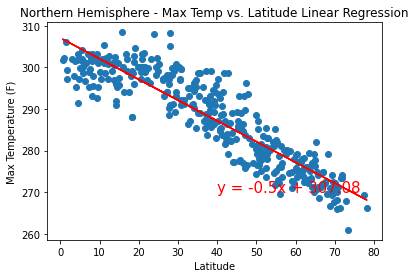

In [21]:
#create linear regresion funtion
x_val = pd.to_numeric(x_N).astype(float)
y_val = pd.to_numeric(y_N).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,270),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
#create variables for axis
x_S=South_df['Lat']
y_S=South_df['Max Temp']

linear regression equation: y = 0.3x + 300.84
r^2= 0.7037795653832586


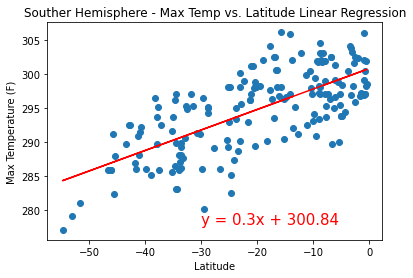

In [23]:
#create linear regresion funtion
x_val = pd.to_numeric(x_S).astype(float)
y_val = pd.to_numeric(y_S).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,278),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Souther Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
#create variables for axis
x_NH=North_df['Lat']
y_NH=North_df['Humidity']

linear regression equation: y = 0.18x + 61.15
r^2= 0.15383405523779525


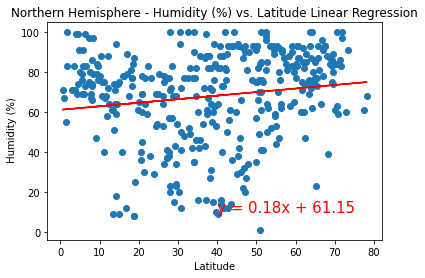

In [25]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NH).astype(float)
y_val = pd.to_numeric(y_NH).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
#create variables for axis
x_SH=South_df['Lat']
y_SH=South_df['Humidity']

linear regression equation: y = 0.23x + 80.48
r^2= 0.19521084313780201


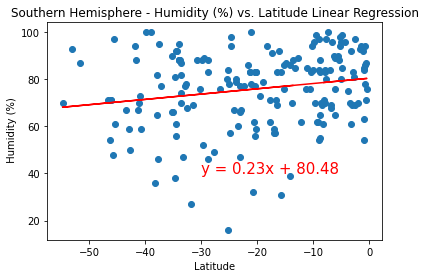

In [27]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SH).astype(float)
y_val = pd.to_numeric(y_SH).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
#create variables for axis
x_NC=North_df['Lat']
y_NC=North_df['Cloudiness']

linear regression equation: y = 0.28x + 43.17
r^2= 0.14645048535424426


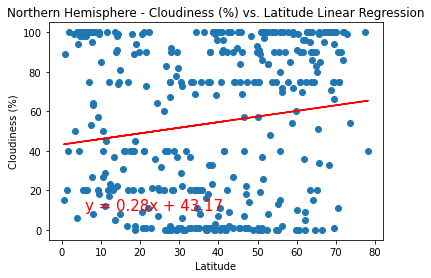

In [29]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NC).astype(float)
y_val = pd.to_numeric(y_NC).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
#create variables for axis
x_SC=South_df['Lat']
y_SC=South_df['Cloudiness']

linear regression equation: y = 0.7x + 69.51
r^2= 0.26213436346366825


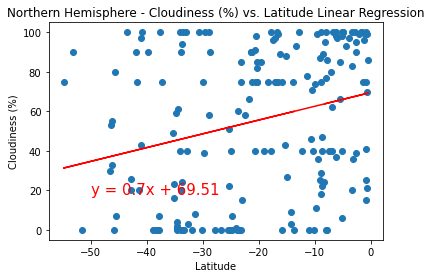

In [31]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SC).astype(float)
y_val = pd.to_numeric(y_SC).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [32]:
#create variables for axis
x_NW=North_df['Lat']
y_NW=North_df['Wind Speed']

linear regression equation: y = 0.01x + 2.81
r^2= 0.1058520944304795


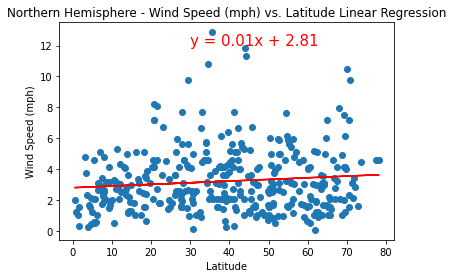

In [33]:
#create linear regresion funtion
x_val = pd.to_numeric(x_NW).astype(float)
y_val = pd.to_numeric(y_NW).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
#create variables for axis
x_SW=South_df['Lat']
y_SW=South_df['Wind Speed']

linear regression equation: y = -0.05x + 2.32
r^2= -0.3062256390992932


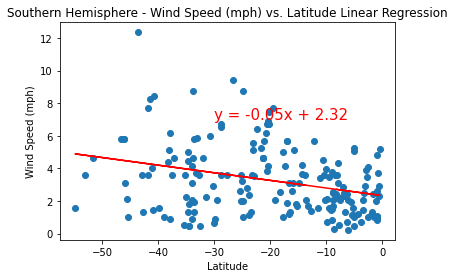

In [35]:
#create linear regresion funtion
x_val = pd.to_numeric(x_SW).astype(float)
y_val = pd.to_numeric(y_SW).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"linear regression equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"r^2= {rvalue}")
plt.show()

# Three observable trends based on the data.

### In the Northern Hemisphere, the Max temperature varies more rapidly along the latitude. The slope is steeper.
### On average, the Southern Hemisphere is more Humit than the northern.  The intercept is higher.
### In general, the Northern Hemisphere has cities with lower temperatures.